# Data Analytics I
Create a **linear regression model** using python to predict the Boston Housing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("HousingData.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
# removing all the null values
df = df.fillna(df.mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

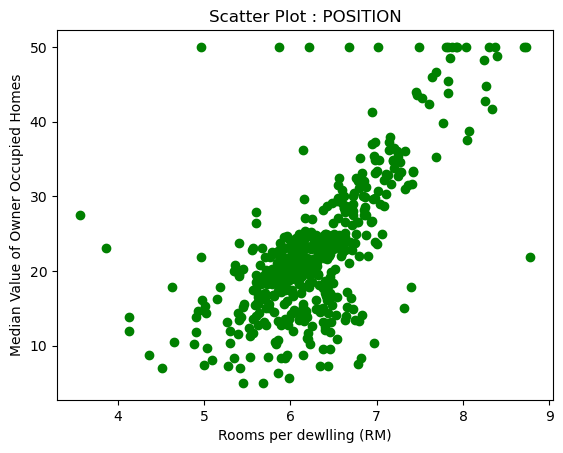

In [8]:
plt.scatter(df['RM'], df['MEDV'], color="GREEN")
plt.xlabel("Rooms per dewlling (RM)")
plt.ylabel('Median Value of Owner Occupied Homes')
plt.title('Scatter Plot : POSITION')
plt.show()

<Axes: >

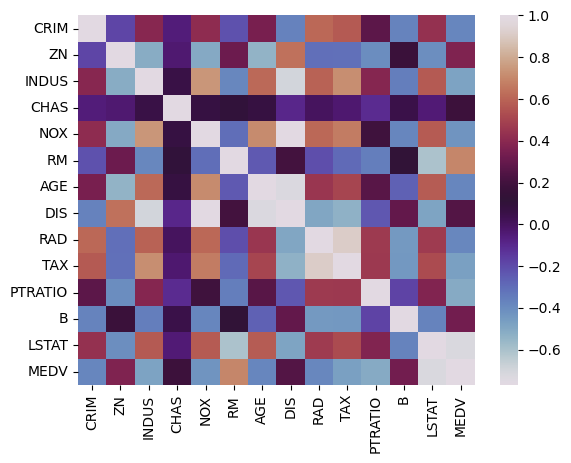

In [9]:
sns.heatmap(df.corr(), cmap="twilight")

**You're splitting the dataset:  
X: All the features (like crime rate, number of rooms, etc.)  
Y: The house price (what you want to predict)**

In [18]:
X = df.iloc[:, 0:-1]   # All columns except the last one (features)
Y = df.iloc[:, -1]     # Only the last column (target: house prices)

**This splits your data:   70% for training
30% for testing  
random_state=42 ensures reproducibility**  

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=42) 

### 📏 What is Scaling? ###
**Scaling means transforming your data so that all features have the same scale (range), usually:**
Mean = 0
Standard Deviation = 1
This is called Standardization (done using StandardScaler in your code).

 ### ⚙️ What happens during Scaling? ###
For each feature 𝑥
x, it applies this formula:  
**𝑥′=(𝑥−mean(𝑥))/std(𝑥)**

So:
**Values are centered around 0
Spread is consistent (std = 1)**

 ### ❓ Why do we do it? ###
**✅ To make all features equally important**
— Features with big numbers (like house size in sq.ft) won't dominate small ones (like crime rate).

**✅ To help algorithms perform better**
— Especially ones that rely on distance (like k-NN, SVM) or gradient-based methods (like linear regression).

**✅ To speed up training**
— Scaling makes convergence faster and more stable.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Training a linear regression model with the scaled features.**

In [20]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

Lr.fit(X_train, Y_train)

LinearRegression()

**coef_ tells you how much each feature contributes to the price.  
intercept_ is the base value when all features are zero.**

In [22]:
print("Coefficients:", Lr.coef_)
print("Intercept:", Lr.intercept_)
# You trained a linear regression model to predict house prices. These coefficients show how much each feature affects the price prediction.

Coefficients: [-1.06184703  0.71347682 -0.07272768  0.94344207 -1.62856223  3.17333232
 -0.70109167 -3.04177516  1.69879013 -1.20047368 -1.99733627  1.02127847
 -3.28653232]
Intercept: 23.01581920903955


In [23]:
Y_pred = Lr.predict(X_test)

**MSE (Mean Squared Error):   Lower is better.  
It’s the average squared difference between actual and predicted prices.  
R² Score: Ranges from 0 to 1.  
Closer to 1 = better fit.  
It tells you how much of the variance in prices is explained by your model.**

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(Y_test, Y_pred))
print("R² Score:", r2_score(Y_test, Y_pred))


MSE: 24.518675231064297
R² Score: 0.6709481059106917
